# Korean Word2Vec

In [1]:
#import modules
from konlpy.tag import Okt
from nltk.tokenize import sent_tokenize
from gensim.models import Word2Vec

#twitter pos tagger
okt = Okt()

#open text file
with open('resume_sample.txt', 'r', encoding='utf-8') as f:
    text = f.read()
    
#sentence tokenizing 
sent_text = sent_tokenize(text)

#extraction of nouns
word_text = []
for sent in sent_text:
    word_text.append(okt.nouns(sent))

#making word2vec model
model = Word2Vec(sentences=word_text, size=100, window=5, min_count=1, workers=10, sg=0)

In [7]:
#print out synonyms
model.wv.most_similar('열정')

[('실제', 0.313908189535141),
 ('한정', 0.2673182487487793),
 ('카메라', 0.25762510299682617),
 ('상품', 0.2533573508262634),
 ('가계', 0.24901333451271057),
 ('맛', 0.22903086245059967),
 ('작성', 0.21263544261455536),
 ('필요성', 0.2080225944519043),
 ('자리', 0.20679402351379395),
 ('수업', 0.20519307255744934)]

In [8]:
#save the trained model
model.init_sims(replace=True)
model.save('sample_model')

In [9]:
#import modules needed for visualization
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

#configuration for korean font setting
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (10,10)

#load model
model = g.Doc2Vec.load('sample_model')

#generate data
vocab = model.wv.vocab
X = model[vocab]

#reduce dimensions
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
X_tsne

C:\Users\Dojun Park\AppData\Local\Continuum\anaconda3\envs\python36\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


array([[ 1.65723705e+01,  1.91667569e+00],
       [-3.08608174e+00,  1.04382658e+01],
       [ 4.33057785e+00,  1.78087254e+01],
       [ 1.09050360e+01, -4.95485401e+00],
       [-3.45281458e+00,  2.53193259e+00],
       [ 3.17308378e+00,  1.79248219e+01],
       [ 1.68634689e+00,  6.47316408e+00],
       [-6.55408001e+00, -1.42329454e+01],
       [-1.06074715e+01,  9.59670916e-03],
       [ 2.66264963e+00, -1.30507250e+01],
       [ 1.48163872e+01, -3.96587491e+00],
       [ 9.79798508e+00, -9.18217373e+00],
       [ 4.81206846e+00, -8.78112972e-01],
       [-5.22748756e+00, -1.23685753e+00],
       [-6.49594247e-01,  8.67589474e-01],
       [ 4.83662462e+00, -5.19556618e+00],
       [ 1.33641624e+01, -1.94455945e+00],
       [ 2.20790243e+00,  3.52031231e+00],
       [ 1.61168232e+01, -7.53945231e-01],
       [-1.68676853e+01, -7.23678350e+00],
       [-7.03172588e+00,  1.56313362e+01],
       [ 4.64565563e+00,  2.57024980e+00],
       [ 8.19524002e+00,  5.94808698e-01],
       [-1.

In [10]:
import pandas as pd

#convert data to dataframe
df = pd.DataFrame(X_tsne,index=vocab, columns=['x', 'y'])
df.shape

(353, 2)

In [11]:
#graph visualization setting
%matplotlib inline

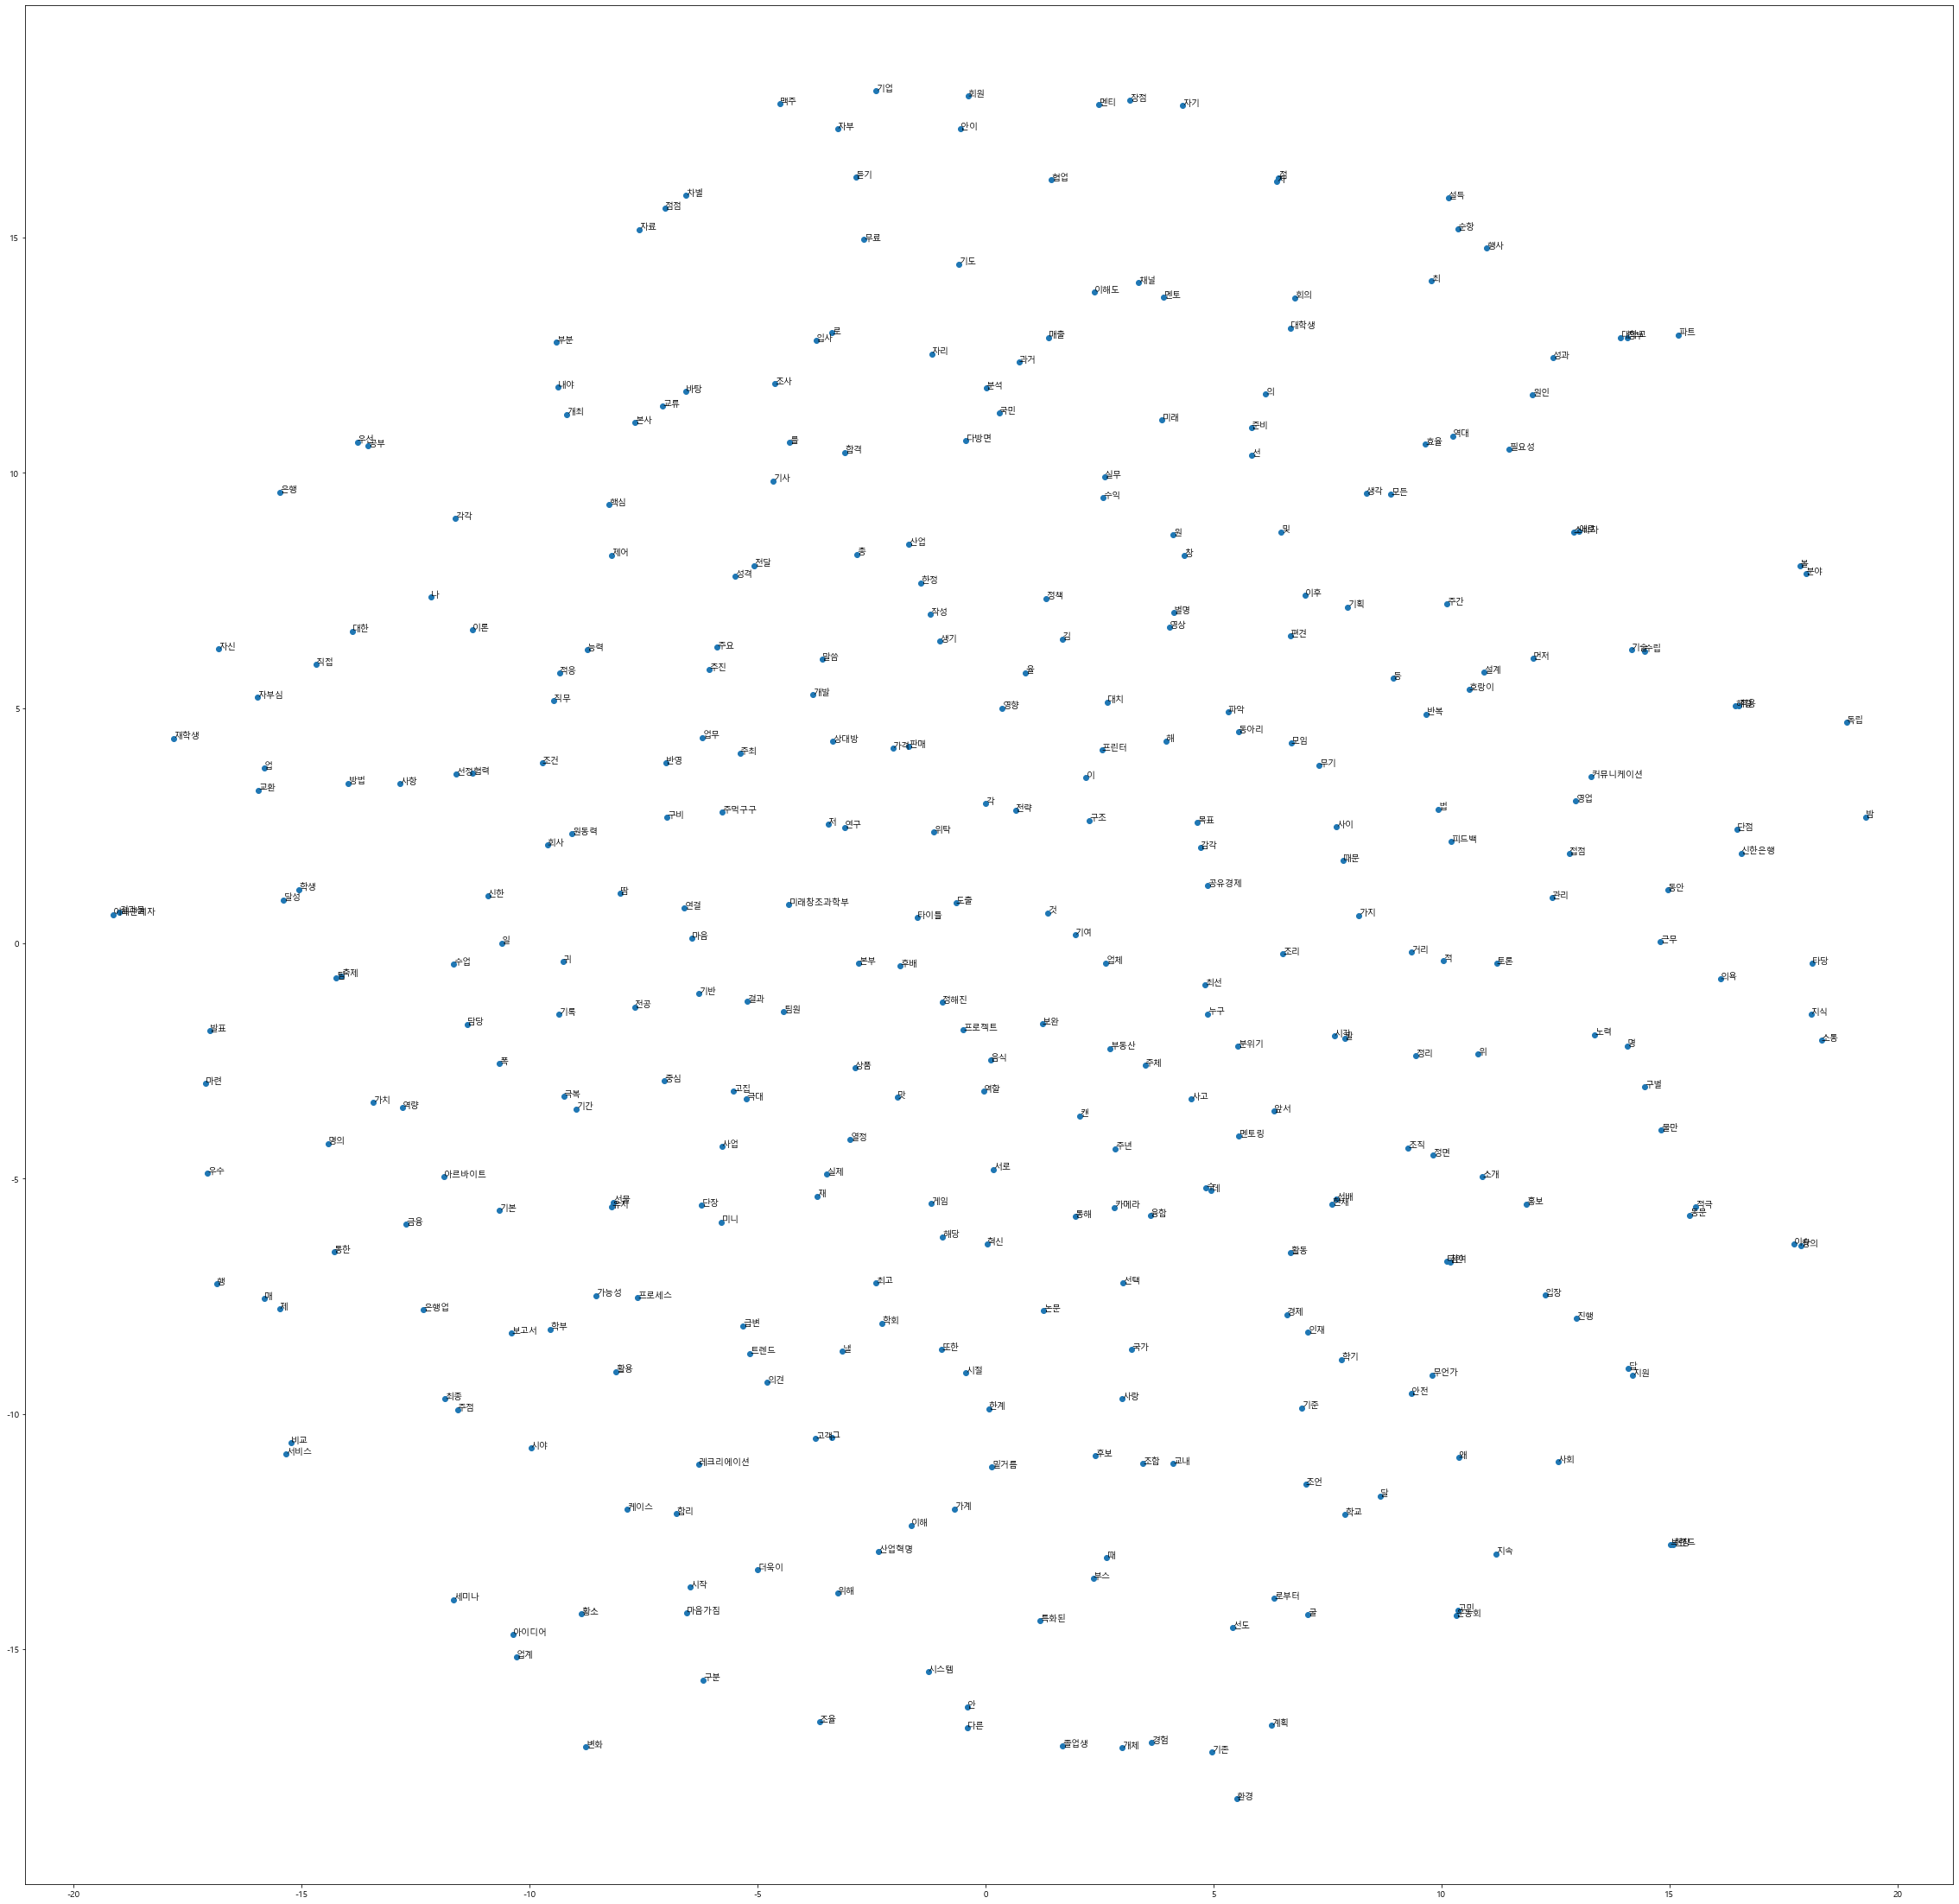

In [12]:
# 2-dim word2vec viualization

fig = plt.figure()
fig.set_size_inches(40, 40)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=10)
plt.show()